# Data Exploration

**Description**: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

**Goal**: Predict which Walmart departments are affected and the extent of the impact of holidays based on limited history.

**Target variable**: Weekly_Sales for each triplet of store, department, and date.

In [1]:
import pandas as pd
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 6
sns.set_palette('dark')

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('train.csv')

In [3]:
train_df.shape, test_df.shape

((421570, 5), (421570, 5))

In [4]:
train_df['test'] = False
test_df['test'] = True

df = train_df.append(test_df).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843140 entries, 0 to 843139
Data columns (total 6 columns):
Store           843140 non-null int64
Dept            843140 non-null int64
Date            843140 non-null object
Weekly_Sales    843140 non-null float64
IsHoliday       843140 non-null bool
test            843140 non-null bool
dtypes: bool(2), float64(1), int64(2), object(1)
memory usage: 27.3+ MB


In [5]:
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,test
0,1,1,2010-02-05,24924.50,False,False
1,1,1,2010-02-12,46039.49,True,False
2,1,1,2010-02-19,41595.55,False,False


In [6]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,Store,Dept,Weekly_Sales
count,"843,140","843,140","843,140"
mean,22,44,"15,981"
std,13,30,"22,711"
min,1,1,"-4,989"
25%,11,18,"2,080"
50%,22,37,"7,612"
75%,33,74,"20,206"
max,45,99,"693,099"


In [7]:
print 'Min: ', df.Date.min()
print 'Max: ', df.Date.max()

Min:  2010-02-05
Max:  2012-10-26


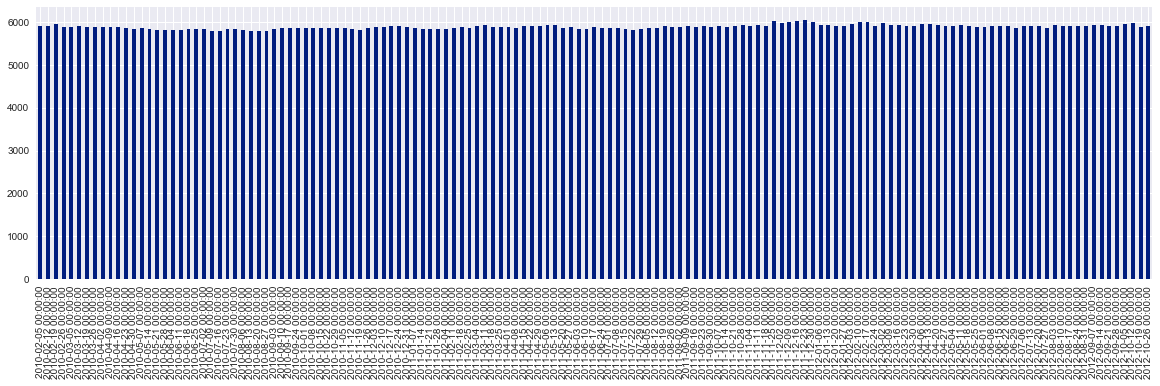

In [8]:
df['Date'] = pd.to_datetime(df.Date)
df.Date.value_counts().sort_index().plot(kind='bar', figsize=(20,5))

In [9]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month

In [10]:
Counter(np.sign(train_df.Weekly_Sales).astype(int)) # negative/positive/zero weekly sales

Counter({-1: 1285, 0: 73, 1: 420212})

In [11]:
np.where(train_df.Weekly_Sales.isnull())

(array([], dtype=int64),)

In [12]:
# let's treat zeros/nulls in weekly sales:
train_df.Weekly_Sales.fillna(value = train_df.Weekly_Sales.median(), inplace = True)

In [13]:
weekly_sales_median = train_df.Weekly_Sales.median()
train_df.Weekly_Sales = np.where(train_df.Weekly_Sales == 0, weekly_sales_median, train_df.Weekly_Sales)

In [14]:
Counter(np.sign(train_df.Weekly_Sales).astype(int)) # negative/positive/zero weekly sales

Counter({-1: 1285, 1: 420285})

/Users/ikononenko/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/Users/ikononenko/tensorflow/lib/python2.7/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


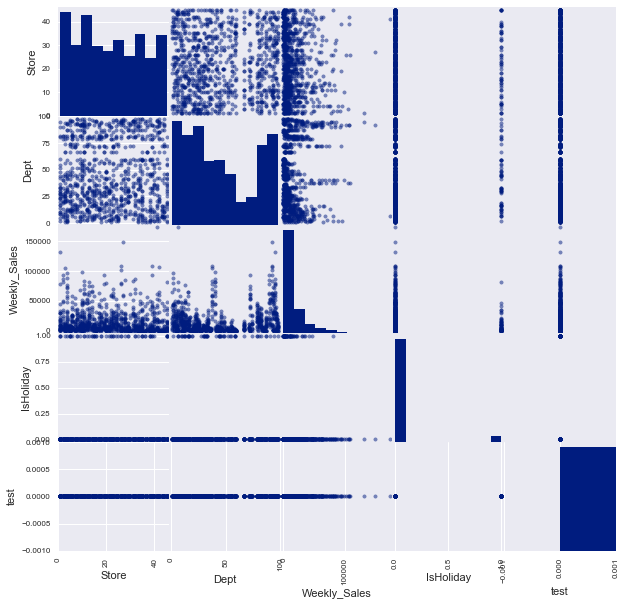

In [15]:
# Scatter Matrix
sample = train_df.sample(n=1000)
pd.scatter_matrix(sample, figsize=(10, 10))
plt.show()

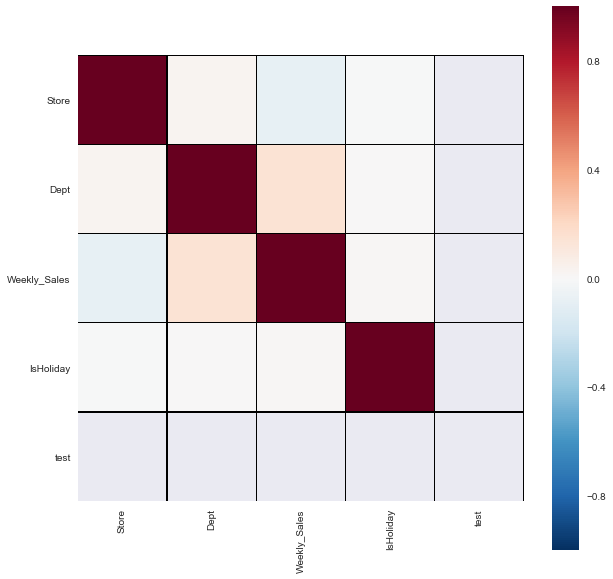

In [16]:
# Pearson Correlation Matrix
sns.heatmap(train_df.corr(), linewidths=0.25, vmax=1.0, square=True , linecolor='black').figure.set_size_inches(10,10)

In [17]:
stores = pd.read_csv('stores.csv') 
additional_features = pd.read_csv('features.csv') 

In [18]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [19]:
additional_features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42,3,nan,nan,nan,nan,nan,211,8,False
1,1,2010-02-12,39,3,nan,nan,nan,nan,nan,211,8,True
2,1,2010-02-19,40,3,nan,nan,nan,nan,nan,211,8,False


In [20]:
additional_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [21]:
additional_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,"8,190","8,190","8,190","4,032","2,921","3,613","3,464","4,050","7,605","7,605"
mean,23,59,3,"7,032","3,384","1,760","3,293","4,132",172,8
std,13,19,0,"9,263","8,794","11,276","6,792","13,087",40,2
min,1,-7,2,"-2,781",-266,-179,0,-185,126,4
25%,12,46,3,"1,578",69,7,305,"1,441",132,7
50%,23,61,4,"4,744",365,36,"1,176","2,727",183,8
75%,34,74,4,"8,923","2,153",163,"3,310","4,833",214,9
max,45,102,4,"103,185","104,520","149,483","67,475","771,448",229,14


In [22]:
additional_features['CPI'].fillna(value = additional_features.CPI.median(),inplace = True)
additional_features['Unemployment'].fillna(value = additional_features.Unemployment.median(), inplace = True)

additional_features = additional_features.drop('IsHoliday', 1)

In [23]:
df = pd.merge(df, additional_features, how='left', on=['Store', 'Date'])

In [24]:
df = pd.merge(df, stores, how='left', on='Store')

In [25]:
for column in ('MarkDown%s' % i for i in range(1,6)):
    df[column].fillna(0, inplace=True)

In [26]:
df['Temperature'].fillna(value = additional_features.Temperature.median(),inplace = True)
df['Fuel_Price'].fillna(value = additional_features.Fuel_Price.median(),inplace = True)
df['CPI'].fillna(value = additional_features.CPI.median(),inplace = True)
df['Unemployment'].fillna(value = additional_features.Unemployment.median(),inplace = True)

In [27]:
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,test,Year,Month,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,"24,924",False,False,2010,2,61,4,0,0,0,0,0,183,8,A,151315
1,1,1,2010-02-12,"46,039",True,False,2010,2,61,4,0,0,0,0,0,183,8,A,151315
2,1,1,2010-02-19,"41,596",False,False,2010,2,61,4,0,0,0,0,0,183,8,A,151315


- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [28]:
def get_holidays(date):
    
    super_bowl = ['2010-02-12','2011-02-11','2012-02-10','2013-02-08']
    labor_day = ['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
    thx_giving = ['2010-11-26','2011-11-25','2012-11-23','2013-11-29']
    xmas = ['2010-12-31','2011-12-30','2012-12-28','2013-12-27']
    if date in super_bowl:
        return "SuperBowl"
    elif date in labor_day:
        return "LaborDay"
    elif date in thx_giving:
        return "Thanksgiving"
    elif date in xmas:
        return "Xmas"
    else:
        return "NotSpecial"

In [29]:
df['Special_Day'] = df.Date.apply(get_holidays)

In [30]:
df.columns

Index([u'Store', u'Dept', u'Date', u'Weekly_Sales', u'IsHoliday', u'test',
       u'Year', u'Month', u'Temperature', u'Fuel_Price', u'MarkDown1',
       u'MarkDown2', u'MarkDown3', u'MarkDown4', u'MarkDown5', u'CPI',
       u'Unemployment', u'Type', u'Size', u'Special_Day'],
      dtype='object')

In [31]:
def get_categorical_features(df): 

    holiday_dummies = pd.get_dummies(df.IsHoliday).rename(columns=lambda x: 'IsHoliday_' + str(x))
    df.drop('IsHoliday', 1, inplace=True)

    special_day_dummies = pd.get_dummies(df.Special_Day).rename(columns=lambda x: str(x))
    df.drop('Special_Day', 1, inplace=True)

    type_dummies = pd.get_dummies(df.Type).rename(columns=lambda x: 'Type_' + str(x))
    df.drop('Type', 1, inplace=True)
    
    store_dummies = pd.get_dummies(df.Store).rename(columns=lambda x: 'Store_' + str(x))
    df.drop('Store', 1, inplace=True)
    
    dept_dummies = pd.get_dummies(df.Dept).rename(columns=lambda x: 'Dept_' + str(x))
    df.drop('Dept', 1, inplace=True)

    year_dummies = pd.get_dummies(df.Year).rename(columns=lambda x: 'Year_' + str(x))
    df.drop('Year', 1, inplace=True)

    month_dummies = pd.get_dummies(df.Month).rename(columns=lambda x: 'Month_' + str(x))
    df.drop('Month', 1, inplace=True)
  
    df_join = pd.concat( [df, holiday_dummies, special_day_dummies, type_dummies, store_dummies, dept_dummies,
                           year_dummies, month_dummies],
                          join='outer', axis=1, ignore_index=False)

    return df_join

In [32]:
df = get_categorical_features(df)
df.shape

(843140, 160)

In [33]:
train_df = df[df.test == False]
test_df = df[df.test == True]

In [34]:
train_df.columns

Index([u'Date', u'Weekly_Sales', u'test', u'Temperature', u'Fuel_Price',
       u'MarkDown1', u'MarkDown2', u'MarkDown3', u'MarkDown4', u'MarkDown5',
       ...
       u'Month_3', u'Month_4', u'Month_5', u'Month_6', u'Month_7', u'Month_8',
       u'Month_9', u'Month_10', u'Month_11', u'Month_12'],
      dtype='object', length=160)

In [35]:
my_features = train_df.columns

In [36]:
my_features = my_features.drop('Date')
my_features = my_features.drop('Weekly_Sales')
my_features = my_features.drop('test')

In [37]:
X = train_df[my_features].copy()
y = np.asarray(train_df['Weekly_Sales'], dtype="|S6")
#train_df.Weekly_Sales.copy()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [ ]:
X_train.isnull().values.any()

False

In [ ]:
%%time
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

In [ ]:
y_prediction = clf.predict(X_test)
y_probability = pd.DataFrame(data=clf.predict_proba(X_test), columns=clf.classes_)

print(classification_report(y_test, y_prediction))
print("Score: %f" % clf.score(X_test, y_test))  
print("Log-loss: %f" % log_loss(y_test, y_probability))